### **Finding Order For ARIMA Model**


In [2]:
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima

# Load data
df = pd.read_csv('sixcrypto.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Define the list of currencies
currency_list = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Filter out warning messages
import warnings
warnings.filterwarnings("ignore")

# Initialize dictionary to store the ARIMA order for each currency
arima_orders = {}

# Iterate over each currency
for currency_name in currency_list:
    
    # Get the currency data
    df_curr = df[df['Name']==currency_name]
    
    # Take first difference of Close values
    diff_data = df_curr['Close'].diff().dropna()
    
    # Fit ARIMA model using auto_arima
    model = auto_arima(diff_data, suppress_warnings=True, error_action='ignore', stepwise=False, seasonal=False)
    
    # Store the ARIMA order for the model in the dictionary
    arima_orders[currency_name] = model.order

# Print the ARIMA orders for all currencies
for currency_name, order in arima_orders.items():
    print(f"ARIMA order for {currency_name}: {order}")

ARIMA order for Litecoin: (1, 0, 4)
ARIMA order for Cardano: (0, 0, 5)
ARIMA order for Binance Coin: (2, 0, 2)
ARIMA order for Dogecoin: (0, 0, 5)
ARIMA order for Ethereum: (2, 0, 3)
ARIMA order for Bitcoin: (2, 0, 1)


### **Auto-fit the ARIMA model**

In [161]:
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import warnings

# Load data
df = pd.read_csv('sixcrypto.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Define the list of currencies
currency_list = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Filter out warning messages
warnings.filterwarnings("ignore")

# Initialize dictionary to store the ARIMA order for each currency
arima_orders = {}

# Initialize string to store the summary output for all currencies
summary_output = ""

# Iterate over each currency
for currency_name in currency_list:
    
    # Get the currency data
    df_curr = df[df['Name']==currency_name]
    
    # Take first difference of Close values
    diff_data = df_curr['Close'].diff().dropna()
    
    # Fit ARIMA model using auto_arima
    model = auto_arima(diff_data, suppress_warnings=True, error_action='ignore', stepwise=False, seasonal=False)
    
    # Store the ARIMA order for the model in the dictionary
    arima_orders[currency_name] = model.order

# Iterate over each currency again
for currency_name in currency_list:
    
    # Get the currency data
    df_curr = df[df['Name']==currency_name]
    
    # Take first difference of Close values
    diff_data = df_curr['Close'].diff().dropna()
    
    # Split data into train and test sets
    train_data = diff_data.iloc[:-30]
    test_data = diff_data.iloc[-30:]
    
    # Get the ARIMA order for the current currency
    p, d, q = arima_orders[currency_name]
    
    # Fit ARIMA model
    model = sm.tsa.ARIMA(train_data, order=(p,d,q))
    model_fit = model.fit()
    
    # Append the summary output for the current currency to the string
    summary_output += f"\nSummary for {currency_name}:\n{model_fit.summary()}\n{'='*80}\n"

# Print the summary output for all currencies in a single window
print(summary_output)



Summary for Litecoin:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1617
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -5670.295
Date:                Fri, 31 Mar 2023   AIC                          11354.590
Time:                        02:05:56   BIC                          11392.309
Sample:                             0   HQIC                         11368.589
                               - 1617                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1049      0.233      0.450      0.653      -0.352       0.561
ar.L1         -0.5704      0.045    -12.557      0.000      -0.659      -0.481
ma.L1          0.5514      0.

### **Actual vs Forecaste**

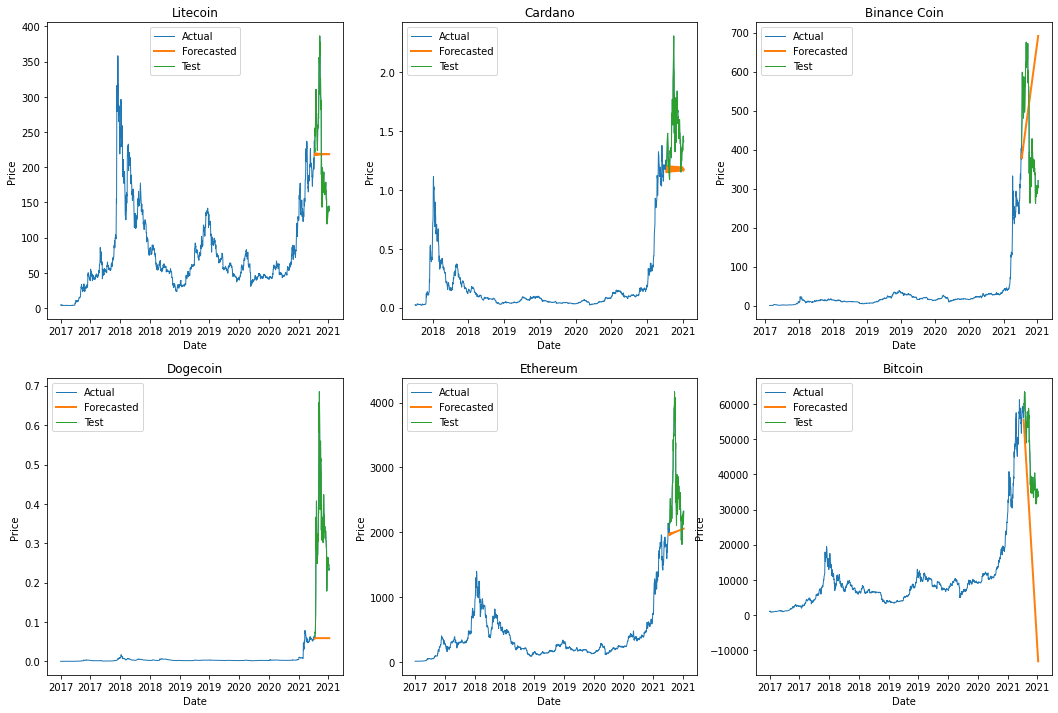

In [6]:
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

# Read the data from the CSV file and parse the 'Date' column as datetime object
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'])

# Define the list of currency names
currency_names = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Plot the actual and forecasted values for each currency in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
for i, ax in enumerate(axes.flatten()):
    if i < len(currency_names):
        # Generate the automatic forecast
        currency_name = currency_names[i]
        currency_data = df[df['Name'] == currency_name]
        df_train = currency_data[:-90]
        df_test = currency_data[-90:]
        auto_arima_model = auto_arima(df_train['Close'], seasonal=False)
        forecast_test_auto = auto_arima_model.predict(n_periods=len(df_test))
        currency_data['forecast'] = [None]*len(df_train) + list(forecast_test_auto)
        
        # Plot the actual, forecasted, and test values with the currency name
        ax.plot(currency_data['Date'], currency_data['Close'], label='Actual', linewidth=1)
        ax.plot(currency_data['Date'], currency_data['forecast'], label='Forecasted', linewidth=2)
        ax.plot(currency_data['Date'][-90:], df_test['Close'], label='Test', linewidth=1)
        ax.legend()
        ax.set_title(currency_name)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')

        # Set the date label format to "year"
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        

plt.show()

### **Evaluate model predictions**


In [193]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Read the data from the CSV file
df = pd.read_csv('sixcrypto.csv')

# Define the list of currency names
currency_names = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Initialize an empty list to store the evaluation results
results = []

# Evaluate the forecasting accuracy for each currency
for currency_name in currency_names:
    # Filter the data for the current currency
    currency_data = df[df['Name'] == currency_name]
    df_train = currency_data[:-30]
    df_test = currency_data[-30:]
    
    # Generate the automatic forecast
    auto_arima_model = auto_arima(df_train['Close'], seasonal=False)
    forecast_test_auto = auto_arima_model.predict(n_periods=len(df_test))
    
    # Evaluate the automatic forecast
    mae_auto = mean_absolute_error(df_test['Close'], forecast_test_auto)
    mape_auto = mean_absolute_percentage_error(df_test['Close'], forecast_test_auto)
    rmse_auto = np.sqrt(mean_squared_error(df_test['Close'], forecast_test_auto))
    mse_auto = mean_squared_error(df_test['Close'], forecast_test_auto)
    r_auto = np.corrcoef(df_test['Close'], forecast_test_auto)[0, 1]
    
    # Append the evaluation results to the list
    results.append([currency_name, mae_auto, mape_auto, rmse_auto, mse_auto, r_auto])

# Convert the results list to a Pandas DataFrame and print the table
results_df = pd.DataFrame(results, columns=['Currency', 'MAE(Auto)', 'MAPE(Auto)', 'RMSE(Auto)', 'MSE(Auto)', 'Correlation(Auto)'])
print(results_df)


       Currency    MAE(Auto)  MAPE(Auto)   RMSE(Auto)     MSE(Auto)  \
0      Litecoin    28.014137    0.203441    32.525932  1.057936e+03   
1       Cardano     0.300314    0.221883     0.326405  1.065400e-01   
2  Binance Coin    80.986173    0.266315    88.266429  7.790963e+03   
3      Dogecoin     0.114577    0.455367     0.123361  1.521786e-02   
4      Ethereum   442.845603    0.211226   500.369902  2.503700e+05   
5       Bitcoin  1840.442687    0.052083  2295.002131  5.267035e+06   

   Correlation(Auto)  
0           0.091333  
1          -0.561022  
2          -0.473708  
3          -0.101342  
4           0.043505  
5          -0.055082  


### **Feature Imporatance**

In [240]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Create a dictionary to store feature importance results
feature_importance = {"High": {}, "Low": {}, "Open": {}, "Volume": {}, "Marketcap": {}}

# Loop through each cryptocurrency
for symbol in df["Symbol"].unique():
    # Subset data for the current cryptocurrency
    subset = df[df["Symbol"] == symbol].reset_index(drop=True)
    
    # Split data into train and test sets
    train_size = int(len(subset) * 0.8)
    train_data = subset[:train_size]
    test_data = subset[train_size:]
    
    # Train random forest and gradient boosting models on training data
    rf_model = RandomForestRegressor()
    gb_model = GradientBoostingRegressor()
    rf_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], train_data["Close"])
    gb_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], train_data["Close"])
    
    # Store feature importance results for the current cryptocurrency
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], rf_model.feature_importances_):
        feature_importance[feature][symbol+"_RF"] = importance
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], gb_model.feature_importances_):
        feature_importance[feature][symbol+"_GB"] = importance

# Convert feature importance dictionary to dataframe
feature_importance_df = pd.DataFrame(feature_importance)

# Print feature importance results
print(feature_importance_df)

             High       Low      Open    Volume  Marketcap
LTC_RF   0.568611  0.253399  0.013361  0.000199   0.164430
LTC_GB   0.552099  0.158031  0.001088  0.000206   0.288576
ADA_RF   0.179217  0.059799  0.022465  0.000329   0.738190
ADA_GB   0.074682  0.027556  0.000012  0.000008   0.897743
BNB_RF   0.349071  0.629772  0.013975  0.000351   0.006830
BNB_GB   0.470637  0.482292  0.000256  0.000263   0.046552
DOGE_RF  0.200652  0.026784  0.008481  0.001488   0.762596
DOGE_GB  0.139075  0.037125  0.000858  0.004060   0.818883
ETH_RF   0.299317  0.082613  0.001764  0.000107   0.616198
ETH_GB   0.283428  0.164588  0.003383  0.000060   0.548541
BTC_RF   0.297071  0.319982  0.009146  0.000272   0.373528
BTC_GB   0.254342  0.212221  0.000808  0.000272   0.532357
